In [198]:
import numpy as np
import pandas as pd

otu_df = pd.read_csv('dataframes/initial data/OTU.txt', sep='\t')
hiera_blast = pd.read_csv('dataframes/initial data/hiera_BLAST.txt', sep='\t')
meta_map_init = pd.read_csv('dataframes/initial data/primary/in.map', sep='\t')
meta = pd.read_csv('dataframes/initial data/init_meta.csv',  sep='\t')
genus_df = pd.read_csv('dataframes/initial data/higherLvl/Genus.txt', sep='\t')

In [199]:
meta_map = meta_map_init.copy()
for column in meta_map.select_dtypes(include=['object']):  
    meta_map[column] = meta_map[column].str.replace('.extendedFrags.fastq.gz', '', regex=False)
    meta_map[column] = meta_map[column].str.replace('K', 'К-', regex=False)
    meta_map[column] = meta_map[column].str.replace('_', '0', regex=False)

replacements = {
    'К-04': 'К-004',
    'К-07': 'К-007',
    'К-08': 'К-008',
    'К-09': 'К-009'
}

# Применяем замену в столбце 'fastqFile'
meta_map['fastqFile'] = meta_map['fastqFile'].replace(replacements)

meta_map = meta_map.drop(columns='SequencingRun')
meta_map = meta_map.rename(columns={'fastqFile':'Номер пробы (кал)'})

In [200]:
# Совпадающие значения
matching_values = meta_map['Номер пробы (кал)'].isin(meta['Номер пробы (кал)'])
matched_values = meta_map['Номер пробы (кал)'][matching_values]

# Уникальные значения в meta_map
unique_in_meta_map = meta_map[~meta_map['Номер пробы (кал)'].isin(meta['Номер пробы (кал)'])]['Номер пробы (кал)']

# Уникальные значения в meta
unique_in_meta = meta[~meta['Номер пробы (кал)'].isin(meta_map['Номер пробы (кал)'])]['Номер пробы (кал)']

print("Совпадающие значения в обоих DataFrame:", matched_values.unique())
print("Уникальные значения в meta_map:", unique_in_meta_map.unique())
print("Уникальные значения в meta:", unique_in_meta.unique())


Совпадающие значения в обоих DataFrame: ['К-011' 'К-013' 'К-059' 'К-060' 'К-062' 'К-063' 'К-066' 'К-068' 'К-069'
 'К-070' 'К-072' 'К-078' 'К-025' 'К-079' 'К-081' 'К-084' 'К-087' 'К-091'
 'К-010' 'К-015' 'К-016' 'К-017' 'К-030' 'К-018' 'К-019' 'К-020' 'К-022'
 'К-023' 'К-024' 'К-026' 'К-028' 'К-029' 'К-031' 'К-033' 'К-034' 'К-035'
 'К-036' 'К-037' 'К-038' 'К-039' 'К-004' 'К-040' 'К-042' 'К-045' 'К-041'
 'К-046' 'К-047' 'К-050' 'К-053' 'К-054' 'К-055' 'К-056' 'К-007' 'К-008'
 'К-009' 'К-044' 'К-048' 'К-051' 'К-057']
Уникальные значения в meta_map: ['К-012']
Уникальные значения в meta: []


In [201]:
merged_df = pd.merge(meta_map, meta, on='Номер пробы (кал)')

# Задаем порядок столбцов
final_meta_df = merged_df[['#SampleID', 'Номер пробы (кал)','GROUP']]
final_meta_df.head()

,#SampleID,Номер пробы (кал),GROUP
0,SMPL0,К-011,KLT
1,SMPL1,К-013,KRN
2,SMPL10,К-059,KRN
3,SMPL11,К-060,KLT
4,SMPL12,К-062,KRN


In [202]:
otu_df.head()

,OTU,SMPL0,SMPL1,SMPL2,SMPL3,SMPL4,SMPL5,SMPL6,SMPL7,SMPL8,...,SMPL50,SMPL51,SMPL52,SMPL53,SMPL54,SMPL55,SMPL56,SMPL57,SMPL58,SMPL59
0,ASV1,151,10,206,66,59484,0,1696,98,10,...,1,12,8108,74,215,1966,20517,30,811,1
1,ASV2,21382,7810,12926,15026,0,6146,2002,21855,8850,...,3509,19789,11672,37302,17184,19472,536,11275,16274,11316
2,ASV3,1978,509,3405,7445,10765,15583,0,0,0,...,2,2341,13376,0,8608,5,4179,5466,18163,509
3,ASV4,13003,1508,20090,5842,0,8570,0,1888,3239,...,1,11849,39,2147,13498,1758,22177,1389,13395,1377
4,ASV5,1518,2474,2097,5096,0,1362,10442,758,7720,...,487,3240,77,3265,3127,123,2420,4903,997,5410


In [203]:
otu_df_transposed = otu_df.set_index('OTU').T
otu_df_transposed = otu_df_transposed.reset_index().rename(columns={'index': '#SampleID'})

# Объединение DataFrame. Убедитесь, что столбец для слияния в final_meta_df называется '#SampleID'
final_otu_merged_df = pd.merge(final_meta_df, otu_df_transposed, on='#SampleID')
final_otu_merged_df.head()

,#SampleID,Номер пробы (кал),GROUP,ASV1,ASV2,ASV3,ASV4,ASV5,ASV6,ASV7,...,ASV2704,ASV2705,ASV2706,ASV2707,ASV2708,ASV2709,ASV2710,ASV2711,ASV2712,ASV2713
0,SMPL0,К-011,KLT,151,21382,1978,13003,1518,30142,0,...,0,0,0,0,0,0,0,0,0,0
1,SMPL1,К-013,KRN,10,7810,509,1508,2474,47,0,...,0,0,0,0,0,0,1,0,0,0
2,SMPL10,К-059,KRN,155539,0,2,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,SMPL11,К-060,KLT,107096,6029,11817,1781,10,163,0,...,0,3,3,1,0,0,0,0,0,0
4,SMPL12,К-062,KRN,22568,0,2274,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0


In [204]:
for col in hiera_blast.columns[1:]: 
    hiera_blast[col] = col[0].lower() + '_' + hiera_blast[col]

hiera_blast['OTU'] = hiera_blast['OTU'].str.replace('_', '')

hiera_blast['Taxonomy'] = hiera_blast['Domain'] + '|' + \
                        hiera_blast['Phylum'] + '|' + \
                        hiera_blast['Class'] + '|' + \
                        hiera_blast['Order'] + '|' + \
                        hiera_blast['Family'] + '|' + \
                        hiera_blast['Genus'] + '|' + \
                        hiera_blast['Species']

hiera_blast = hiera_blast[['OTU', 'Taxonomy']]

hiera_blast.head()

,OTU,Taxonomy
0,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...
1,ASV2688,d_Bacteria|p_Firmicutes|c_Clostridia|o_Oscillo...
2,ASV2700,d_Bacteria|p_Firmicutes|c_Clostridia|o_Oscillo...
3,ASV2686,d_Bacteria|p_Firmicutes|c_Clostridia|o_Oscillo...
4,ASV2693,d_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bact...


In [205]:
long_merged_df = pd.melt(final_otu_merged_df, id_vars=['#SampleID', 'GROUP'], var_name='OTU', value_name='Value')

# Объединяем hiera_blast с long_merged_df по столбцу 'OTU'
merged_result = pd.merge(hiera_blast, long_merged_df, on='OTU', how='inner')

#merged_result.to_csv('dataframes/output/merged_hiera_otu_meta.csv', sep='\t')
merged_result.head()

,OTU,Taxonomy,#SampleID,GROUP,Value
0,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL0,KLT,0
1,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL1,KRN,0
2,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL10,KRN,0
3,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL11,KLT,0
4,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL12,KRN,0


In [206]:
import pandas as pd

def check_df(df):
    # Проверяем, есть ли в столбце 'Value' значения NaN до преобразования
    print(df['Value'].isna().any())
    # Проверяем уникальные типы данных в столбце 'Value'
    print(df['Value'].apply(type).unique())
    # Идентификация строк, которые могут содержать неочевидные нечисловые символы
    possible_non_numeric = df[df['Value'].astype(str).str.contains(r'^\s*$|^-$', regex=True)]
    print(possible_non_numeric)

check_df(merged_result)


False
[<class 'int'>]
Empty DataFrame
Columns: [OTU, Taxonomy, #SampleID, GROUP, Value]
Index: []


In [207]:
import pandas as pd

def iqr_filter(df):
    Q1 = df['Value'].quantile(0.25)
    Q3 = df['Value'].quantile(0.75)
    IQR = Q3 - Q1

    # Определяем границы выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Фильтруем выбросы
    iqr_merged_df = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

    # Показываем результаты
    print("Оригинальный размер DataFrame:", df.shape[0])
    print("Размер DataFrame после фильтрации выбросов:", iqr_merged_df.shape[0])
    return iqr_merged_df

iqr_merged_df = iqr_filter(merged_result)


Оригинальный размер DataFrame: 144963
Размер DataFrame после фильтрации выбросов: 113278


Для корректного выполнения перечисленных статистических тестов необходимо учесть следующие условия и подготовительные шаги для данных:

### U-Statistic (Mann-Whitney U test) и p-value (Mann-Whitney U test)
- **Условия:** Тест применим для двух независимых выборок. Предполагает, что выборки взяты из непрерывных распределений, но не требует нормальности распределения.
- **Подготовка данных:** Удаление выбросов может быть рекомендовано для уменьшения их влияния на результат. Необходимо убедиться, что в данных нет пропущенных значений.

### T-Statistic (Welch's t-test) и p-value (Welch's t-test)
- **Условия:** Тест предполагает две независимые выборки. Не требует равенства дисперсий (в отличие от стандартного t-теста), что делает его более надежным при различных дисперсиях выборок.
- **Подготовка данных:** Убедитесь, что нет пропущенных значений. Выбросы могут исказить результаты, поэтому их следует идентифицировать и обработать. Проверка на нормальность распределения каждой из выборок рекомендуется, хотя тест Welch's t-test более устойчив к нарушениям нормальности.

### Kruskal-Wallis Statistic и p-value (Kruskal-Wallis)
- **Условия:** Подходит для двух и более независимых выборок. Не требует предположения о нормальности распределений.
- **Подготовка данных:** Необходимо удалить пропущенные значения. Выбросы могут оказывать влияние на результат, поэтому их следует обработать.

### F-Statistic (ANOVA) и p-value (ANOVA)
- **Условия:** Используется для сравнения средних трех и более групп. Требует нормальности распределения в каждой группе и равенства дисперсий между группами.
- **Подготовка данных:** Необходимо проверить данные на нормальность распределения и гомогенность дисперсий. Удаление пропущенных значений и обработка выбросов рекомендуется.

### p-value (Permutation test)
- **Условия:** Тест не делает предположений о распределении данных и может использоваться для любых типов данных.
- **Подготовка данных:** Удаление пропущенных значений обязательно. Подход подразумевает равный размер выборок или корректировку под это условие. Выбросы могут быть обработаны для уменьшения их влияния на результат.

**Общие рекомендации по подготовке данных:**
- **Удаление пропущенных значений:** Всегда проверяйте и удаляйте пропущенные значения, так как большинство статистических тестов не могут быть проведены с пропущенными данными.
- **Обработка выбросов:** Идентификация и обработка выбросов может быть важна, так как они могут существенно исказить результаты тестов.
- **Проверка предположений:** Для некоторых тестов (например, ANOVA) важно проверить нормальность распределения и равенство дисперсий между группами.


In [208]:
import pandas as pd
from scipy.stats import mannwhitneyu


def statics(df):
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

    group_klt = df[df['GROUP'] == 'KLT']['Value']
    group_krn = df[df['GROUP'] == 'KRN']['Value']

    # Проверка, что в каждой группе есть хотя бы два наблюдения
    if len(group_klt) > 1 and len(group_krn) > 1:
        # Расчет p-value с помощью Mann-Whitney U теста
        u_statistic, p_value = mannwhitneyu(group_klt, group_krn, alternative='two-sided')
        print(f'U-Statistic mannwhitneyu: {u_statistic}')
        print(f'p-value mannwhitneyu: {p_value}')
    else:
        print("Одна из групп содержит слишком мало значений для анализа.")

    from scipy.stats import ttest_ind

    t_stat, p_value_t_test = ttest_ind(group_klt, group_krn, equal_var=False)  # equal_var=False для Welch's t-test
    print(f'T-Statistic Welch\'s t-test: {t_stat}')
    print(f'p-value (T-test) Welch\'s t-test: {p_value_t_test}')

    from scipy.stats import kruskal

    kruskal_stat, p_value_kruskal = kruskal(group_klt, group_krn)
    print(f'Kruskal-Wallis Statistic: {kruskal_stat}')
    print(f'p-value (Kruskal-Wallis): {p_value_kruskal}')

    from scipy.stats import f_oneway

    f_stat, p_value_akrnva = f_oneway(group_klt, group_krn)
    print(f'F-Statistic (AkrnVA): {f_stat}')
    print(f'p-value (AkrnVA): {p_value_akrnva}')

    from mlxtend.evaluate import permutation_test

    p_value_permutation = permutation_test(group_klt, group_krn, method='approximate', num_rounds=10000, seed=0)
    print(f'p-value (Permutation test): {p_value_permutation}')

df = merged_result.copy()
statics(df)


U-Statistic mannwhitneyu: 2626417745.5
p-value mannwhitneyu: 0.9462271426603427
T-Statistic Welch's t-test: 0.09897210594569204
p-value (T-test) Welch's t-test: 0.9211605553238099
Kruskal-Wallis Statistic: 0.004548891021812685
p-value (Kruskal-Wallis): 0.9462270741174466
F-Statistic (AkrnVA): 0.009811202157183065
p-value (AkrnVA): 0.9210975069466337
p-value (Permutation test): 0.9193080691930807


In [209]:
import pandas as pd

data = merged_result.copy()

# Создание нового столбца 'Sample_Group'
data['Sample_Group'] = data['#SampleID'] + '_' + data['GROUP']

# Создание сводной таблицы
pivot_df = data.pivot_table(index='Taxonomy', columns='Sample_Group', values='Value', aggfunc='sum', fill_value=0)

# Сброс индекса, чтобы 'Taxonomy' стал столбцом
pivot_df.reset_index(inplace=True)

# Вывод первых нескольких строк полученного DataFrame для проверки
pivot_df.head()

/tmp/ipykernel_21797/3608816967.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_df = data.pivot_table(index='Taxonomy', columns='Sample_Group', values='Value', aggfunc='sum', fill_value=0)


Sample_Group,Taxonomy,SMPL0_KLT,SMPL10_KRN,SMPL11_KLT,SMPL12_KRN,SMPL13_KLT,SMPL14_KRN,SMPL15_KRN,SMPL16_KRN,SMPL17_KLT,...,SMPL55_KRN,SMPL56_KLT,SMPL57_KLT,SMPL58_KRN,SMPL59_KRN,SMPL5_KLT,SMPL6_KRN,SMPL7_KRN,SMPL8_KRN,SMPL9_KLT
0,d_Archaea|p_Crenarchaeota|c_Nitrososphaeria|o_...,0,0,0,0,0,0,0,223,0,...,0,0,0,0,0,0,0,0,0,0
1,d_Archaea|p_Euryarchaeota|c_Methanobacteria|o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,d_Archaea|p_Euryarchaeota|c_Methanobacteria|o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d_Bacteria|p_?|c_?|o_?|f_?|g_?|s_?,0,0,0,0,0,0,1,11051,0,...,0,0,0,0,0,0,0,1,0,0
4,d_Bacteria|p_Acidobacteria|c_Acidobacteriia|o_...,0,0,0,0,0,0,0,17,0,...,0,0,0,0,0,0,0,0,0,0


1: (780, 60)
2: (780, 60)


/home/esp/data_analyze/18.03.2024/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipykernel_21797/964178445.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


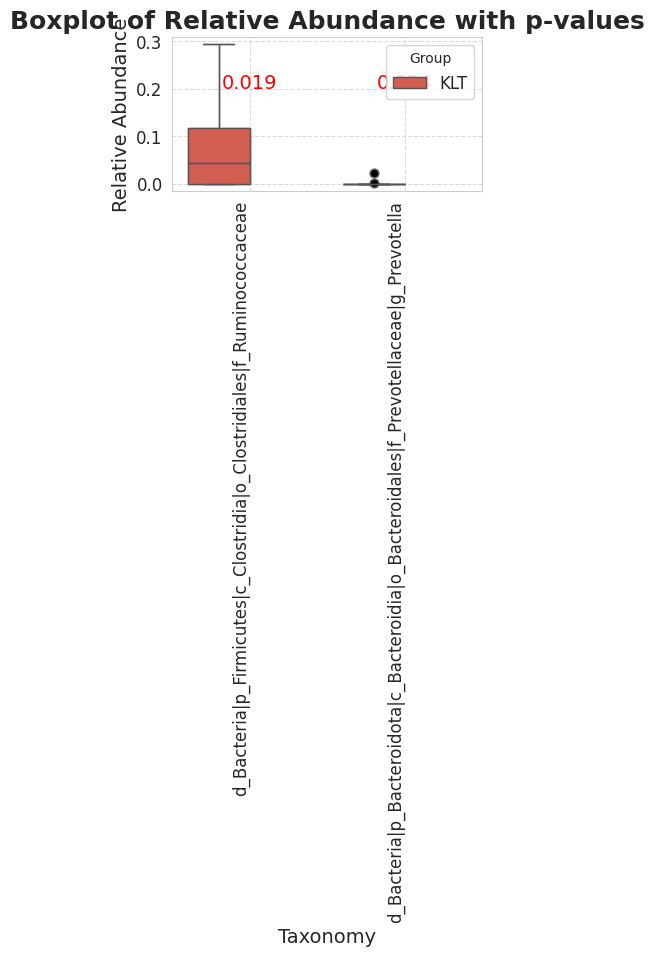

Таксон: d_Bacteria|p_Firmicutes|c_Clostridia|o_Clostridiales|f_Ruminococcaceae, p-value: 0.0194
Таксон: d_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacteroidales|f_Prevotellaceae|g_Prevotella, p-value: 0.0339


In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def rename_taxa(row):
    parts = row.split('|')
    cleaned_parts = [part for part in parts if not part.endswith('_?')]
    return '|'.join(cleaned_parts)

pivot_df['Taxonomy'] = pivot_df['Taxonomy'].apply(rename_taxa)
#pivot_df['Taxonomy'] = pivot_df['Taxonomy'].str.split('|').str[-1]

# Рассчитываем относительное изобилие для каждого таксона в каждом образце
sample_columns = [col for col in pivot_df.columns if 'SMPL' in col]  # Измените на правильные имена столбцов
pivot_df.fillna(0, inplace=True)
print(f'1: {pivot_df.shape}')

relative_abundance_df = pivot_df.copy()
relative_abundance_df[sample_columns] = relative_abundance_df[sample_columns].div(relative_abundance_df[sample_columns].sum(axis=1), axis=0)
print(f'2: {pivot_df.shape}')

# Переупорядочиваем столбцы, чтобы "Taxonomy" был первым
relative_abundance_df = relative_abundance_df[['Taxonomy'] + sample_columns]

# Размещаем данные в "длинном" формате для boxplot
melted_df = relative_abundance_df.melt(id_vars='Taxonomy', var_name='Sample', value_name='Relative Abundance')

# Удаляем строки с Relative Abundance == 0
melted_df = melted_df[melted_df['Relative Abundance'] != 0].reset_index(drop=True)

# Определяем группы на основе названий образцов
melted_df['Group'] = melted_df['Sample'].apply(lambda x: 'KLT' if 'KLT' in x else 'KRN')

# Настройка визуализации
sns.set_style("whitegrid")
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, linestyle='none')

# Расчет p-значений для каждого таксона
p_values = {}
significant_taxa = {}  # Словарь для хранения значимых таксонов и их p-значений
for taxon in melted_df['Taxonomy'].unique():
    yes_values = melted_df[(melted_df['Taxonomy'] == taxon) & (melted_df['Group'] == 'KLT')]['Relative Abundance']
    no_values = melted_df[(melted_df['Taxonomy'] == taxon) & (melted_df['Group'] == 'KRN')]['Relative Abundance']
    
    if len(yes_values) > 1 and len(no_values) > 1:
        t_stat, p_val = ttest_ind(yes_values, no_values, nan_policy='omit')
        if p_val < 0.05:  # Фильтрация значений p по порогу 0.05
            significant_taxa[taxon] = p_val

# Фильтрация melted_df для включения только значимых таксонов
significant_melted_df = melted_df[melted_df['Taxonomy'].isin(significant_taxa.keys())]
colors = ['#3498db', '#e74c3c']
# Визуализация
plt.figure(figsize=(4, 2))
sns.boxplot(x='Taxonomy', y='Relative Abundance', hue='Group', data=significant_melted_df, palette=colors, flierprops=flierprops, whis=2, hue_order=['KLT','KLT'])

# Добавляем значимые p-значения на график
for i, taxon in enumerate(significant_melted_df['Taxonomy'].unique()):
    p_val = significant_taxa.get(taxon)
    if p_val:  # Если таксон значим
        plt.text(i, 0.2, f"{p_val:.3f}", ha='center', color="red", size=14)

# Оформление графика
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Taxonomy', fontsize=14)
plt.ylabel('Relative Abundance', fontsize=14)
plt.title('Boxplot of Relative Abundance with p-values', fontsize=18, fontweight='bold')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(loc="upper right", fontsize=12, title="Group")
plt.tight_layout()

# Сохранение и отображение графика
#plt.savefig('significant_relative_abundance_boxplot.pdf', bbox_inches = 'tight')
plt.show()

# Вывод значимых таксонов и их p-значений
for taxon, p_val in significant_taxa.items():
    print(f"Таксон: {taxon}, p-value: {p_val:.4f}")

In [211]:
genus_df.head()

,Genus,SMPL0,SMPL1,SMPL10,SMPL11,SMPL12,SMPL13,SMPL14,SMPL15,SMPL16,...,SMPL54,SMPL55,SMPL56,SMPL57,SMPL58,SMPL59,SMPL6,SMPL7,SMPL8,SMPL9
0,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,0,0,0,0,0,0,0,0,223,...,0,0,0,0,0,0,0,0,0,0
1,Archaea;Euryarchaeota;Methanobacteria;Methanob...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Archaea;Euryarchaeota;Methanobacteria;Methanob...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bacteria;?;?;?;?;?,0,0,0,0,0,0,0,1,11051,...,0,0,0,0,0,0,0,1,0,0
4,Bacteria;Acidobacteria;Acidobacteriia;Acidobac...,0,0,0,0,0,0,0,0,17,...,0,0,0,0,0,0,0,0,0,0


In [212]:
merged_result.head()

,OTU,Taxonomy,#SampleID,GROUP,Value
0,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL0,KLT,0
1,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL1,KRN,0
2,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL10,KRN,0
3,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL11,KLT,0
4,ASV2713,d_Bacteria|p_Firmicutes|c_Bacilli|o_Erysipelot...,SMPL12,KRN,0


In [213]:
import pandas as pd

# Транспонирование genus_df и сброс индекса
genus_df_transposed = genus_df.T.reset_index()

# Переименование столбцов транспонированного DataFrame
genus_df_transposed.columns = ['#SampleID'] + list(genus_df['Genus'])

# Удаление первой строки, которая теперь содержит исходные имена столбцов
genus_df_transposed = genus_df_transposed.drop(genus_df_transposed.index[0])

# Преобразование SampleID в формат, соответствующий final_meta_df (если требуется)
# Это зависит от формата данных в ваших DataFrame и может не потребоваться.

# Слияние final_meta_df с транспонированным genus_df по SampleID
merged_genus_df = pd.merge(final_meta_df, genus_df_transposed, on='#SampleID', how='left')
merged_genus_df = merged_genus_df.drop(columns=['Номер пробы (кал)'])

# Вывод первых строк объединенного DataFrame для проверки
merged_genus_df.head()


,#SampleID,GROUP,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosopumilales;Nitrosopumilaceae;?,Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanobrevibacter,Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanosphaera,Bacteria;?;?;?;?;?,Bacteria;Acidobacteria;Acidobacteriia;Acidobacteriales;Koribacteraceae;?,Bacteria;Acidobacteriota;?;?;?;?,Bacteria;Acidobacteriota;Acidobacteriae;?;?;?,Bacteria;Acidobacteriota;Acidobacteriae;Acidobacteriales;?;?,...,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Chujaibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;?,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Thermomonas,Bacteria;Synergistota;Synergistia;Synergistales;Synergistaceae;Cloacibacillus,Bacteria;Verrucomicrobiota;Verrucomicrobiae;?;?;?,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Chthoniobacterales;Chthoniobacteraceae;Candidatus Udaeobacter,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia,Eukaryota;Vertebrata;Mammalia;?;?;?,noHit;
0,SMPL0,KLT,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
1,SMPL1,KRN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2870,0,17
2,SMPL10,KRN,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,117
3,SMPL11,KLT,0,0,0,0,0,0,0,0,...,596,0,0,0,0,0,0,24,1,26458
4,SMPL12,KRN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
import pandas as pd

# Предполагается, что merged_genus_df уже загружен в вашей среде выполнения

# Преобразование DataFrame в длинный формат
long_format_df = pd.melt(merged_genus_df, 
                         id_vars=['#SampleID', 'GROUP'], 
                         var_name='Taxonomy', 
                         value_name='Value')

# Опционально: если вы хотите добавить уникальные идентификаторы для OTU, как в примере
long_format_df['OTU'] = 'ASV' + (long_format_df.index + 1).astype(str).str.zfill(4)

# Перестановка столбцов для соответствия желаемому порядку
long_format_df = long_format_df[['OTU', 'Taxonomy', '#SampleID', 'GROUP', 'Value']]

# Вывод первых нескольких строк для проверки
long_format_df.head()

,OTU,Taxonomy,#SampleID,GROUP,Value
0,ASV0001,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL0,KLT,0
1,ASV0002,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL1,KRN,0
2,ASV0003,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL10,KRN,0
3,ASV0004,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL11,KLT,0
4,ASV0005,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL12,KRN,0


/tmp/ipykernel_21797/1471973022.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  otu_table = long_format_df.pivot_table(index='#SampleID', columns='OTU', values='Value', aggfunc='sum', fill_value=0)
/tmp/ipykernel_21797/1471973022.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GROUP', y='Shannon', data=diversity_df.reset_index(), palette=palette, width=0.6)
/tmp/ipykernel_21797/1471973022.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GROUP', y='Simpson

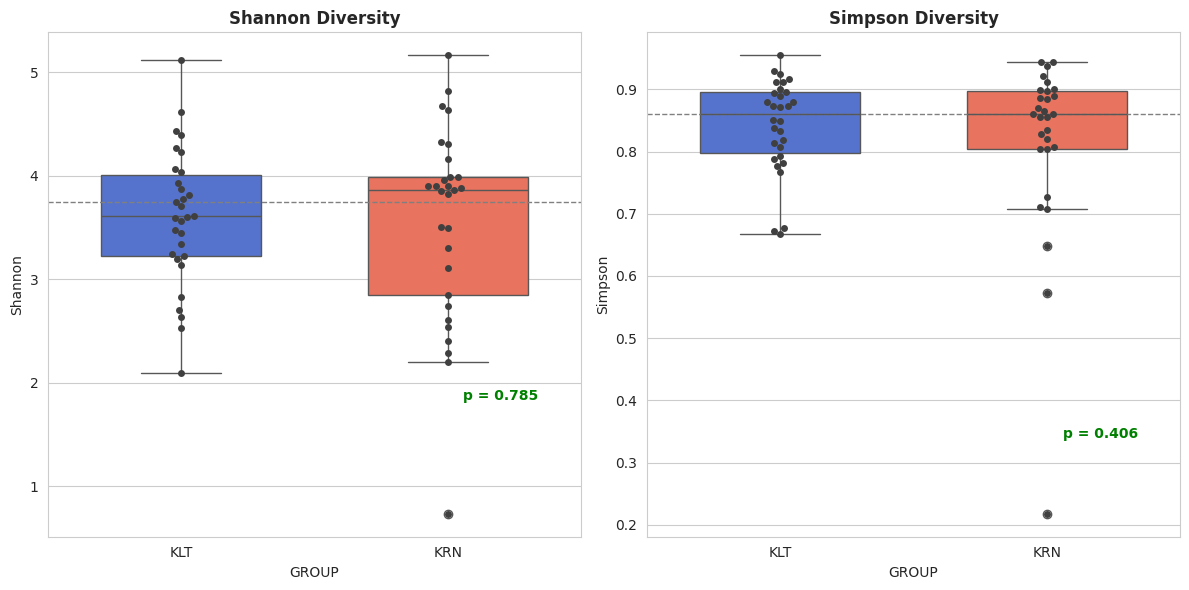

P-value for Shannon Index: 0.7852304125585536
P-value for Shannon Index: 0.40586429531213497


In [215]:
import pandas as pd
from skbio.diversity import alpha_diversity
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных для расчёта альфа-разнообразия
otu_table = long_format_df.pivot_table(index='#SampleID', columns='OTU', values='Value', aggfunc='sum', fill_value=0)

# Расчет альфа-разнообразия для индексов Шеннона и Симпсона
shannon_diversity = alpha_diversity('shannon', otu_table.values, ids=otu_table.index.tolist())
simpson_diversity = alpha_diversity('simpson', otu_table.values, ids=otu_table.index.tolist())

# Объединение результатов с исходным DataFrame
diversity_df = long_format_df.drop_duplicates(subset=['#SampleID', 'GROUP']).set_index('#SampleID')
diversity_df['Shannon'] = shannon_diversity
diversity_df['Simpson'] = simpson_diversity

# Межгрупповое сравнение для индекса Шеннона
shannon_klt = diversity_df[diversity_df['GROUP'] == 'KLT']['Shannon']
shannon_krn = diversity_df[diversity_df['GROUP'] == 'KRN']['Shannon']
t_stat, shannon_p_value = ttest_ind(shannon_klt, shannon_krn)

Simpson_klt = diversity_df[diversity_df['GROUP'] == 'KLT']['Simpson']
Simpson_krn = diversity_df[diversity_df['GROUP'] == 'KRN']['Simpson']
t_stat, Simpson_p_value = ttest_ind(Simpson_klt, Simpson_krn)

# Визуализация
plt.figure(figsize=(12, 6))
palette = {"KLT": "royalblue", "KRN": "tomato"}

# Boxplot и swarmplot для Shannon Diversity
plt.subplot(1, 2, 1)
sns.boxplot(x='GROUP', y='Shannon', data=diversity_df.reset_index(), palette=palette, width=0.6)
sns.swarmplot(x='GROUP', y='Shannon', data=diversity_df.reset_index(), color=".25")
plt.title('Shannon Diversity', fontweight="bold")
plt.text(1.2, max(diversity_df['Shannon']) * 0.35, f'p = {shannon_p_value:.3f}', ha='center', va='bottom', color='green', fontsize=10, fontweight="bold")
plt.axhline(diversity_df['Shannon'].median(), color='gray', linestyle='dashed', linewidth=1)

plt.subplot(1, 2, 2)
sns.boxplot(x='GROUP', y='Simpson', data=diversity_df.reset_index(), palette=palette, width=0.6)
sns.swarmplot(x='GROUP', y='Simpson', data=diversity_df.reset_index(), color=".25")
plt.title('Simpson Diversity', fontweight="bold")
plt.text(1.2, max(diversity_df['Simpson']) * 0.35, f'p = {Simpson_p_value:.3f}', ha='center', va='bottom', color='green', fontsize=10, fontweight="bold")
plt.axhline(diversity_df['Simpson'].median(), color='gray', linestyle='dashed', linewidth=1)

plt.tight_layout()
# plt.savefig('/home/esp/data_analyze/18.03.2024/figures/genus/alpha.pdf', bbox_inches = 'tight')

plt.show()

# Вывод p-значения для Шеннона
print(f"P-value for Shannon Index: {shannon_p_value}")
print(f"P-value for Shannon Index: {Simpson_p_value}")


/tmp/ipykernel_21797/690623623.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_pivot = long_format_df.pivot_table(index='#SampleID', columns='Taxonomy', values='Value', fill_value=0)
/home/esp/data_analyze/18.03.2024/venv/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.10655746569383316 and the largest is 4.7130352879894435.
  warn(
/home/esp/data_analyze/18.03.2024/v

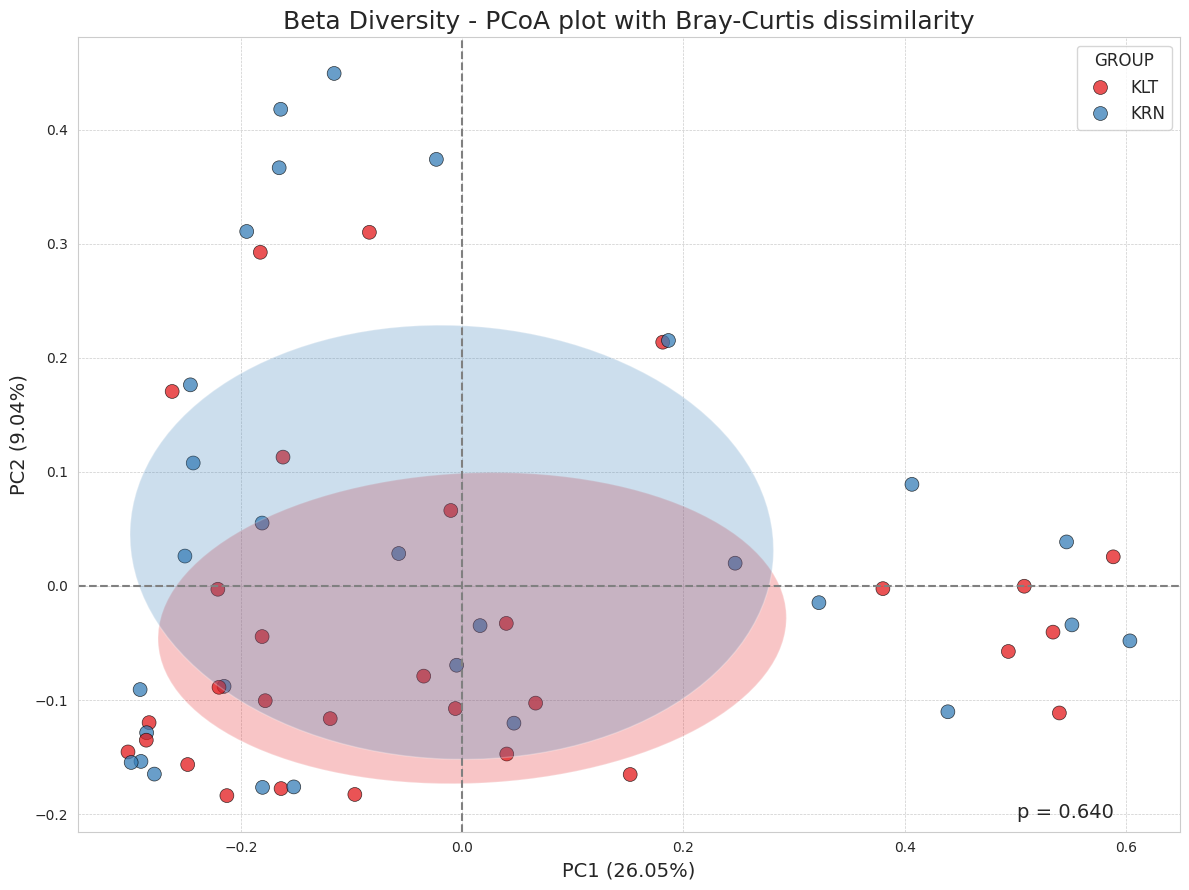

In [270]:
import pandas as pd
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Ellipse
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных
data_pivot = long_format_df.pivot_table(index='#SampleID', columns='Taxonomy', values='Value', fill_value=0)
samples = data_pivot.index.tolist()
group_labels = long_format_df.drop_duplicates(subset=['#SampleID']).set_index('#SampleID')['GROUP']

# Создание матрицы расстояний на основе Bray-Curtis dissimilarity
dm = beta_diversity("braycurtis", data_pivot.values, ids=samples)

# PCoA анализ
pcoa_results = pcoa(dm)

# Сохранение результатов PCoA в DataFrame
pcoa_df = pcoa_results.samples
pcoa_df['GROUP'] = group_labels.values

# Функция для рисования элипсов вокруг групп точек
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 2):
        ell = Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs)
        ax.add_patch(ell)

# Расчет PERMANOVA
permanova_results = permanova(dm, group_labels)

# Извлечение p-значения
p_val = permanova_results['p-value']

# Визуализация PCoA с p-значением
plt.figure(figsize=(12, 9))
sns.scatterplot(x='PC1', y='PC2', hue='GROUP', data=pcoa_df, s=100, alpha=0.75, palette="Set1", edgecolor="black", linewidth=0.5)
for label, group_df in pcoa_df.groupby("GROUP"):
    # Обратите внимание на использование sns.color_palette() для получения цвета
    color = sns.color_palette("Set1")[list(pcoa_df['GROUP'].unique()).index(label)]
    draw_ellipse(group_df[["PC1", "PC2"]].mean(), group_df[["PC1", "PC2"]].cov(), alpha=0.25, facecolor=color)
plt.title("Beta Diversity - PCoA plot with Bray-Curtis dissimilarity", fontsize=18)
plt.xlabel(f"PC1 ({pcoa_results.proportion_explained.iloc[0]:.2%})", fontsize=14)
plt.ylabel(f"PC2 ({pcoa_results.proportion_explained.iloc[1]:.2%})", fontsize=14)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(title='GROUP', fontsize=12, title_fontsize=12)
plt.text(.94, 0.012, f"p = {p_val:.3f}", ha="right", va="bottom", transform=plt.gca().transAxes, fontsize=14)
plt.savefig('/home/esp/data_analyze/18.03.2024/figures/genus/beta.pdf', bbox_inches = 'tight')
plt.tight_layout()
plt.show()


In [225]:
def transform_taxonomy(row):
    tax_levels = row.split(';')
    prefixes = ['k_', 'p_', 'c_', 'o_', 'f_', 'g_', 's_']
    transformed = '|'.join([f"{prefix}{level}" for prefix, level in zip(prefixes, tax_levels)])
    return transformed

new_long_format_df = long_format_df.copy()

new_long_format_df['Taxonomy'] = new_long_format_df['Taxonomy'].apply(transform_taxonomy)

def trim_taxonomy(taxonomy):
    pos = taxonomy.find('_?')
    if pos != -1:
        return taxonomy[:taxonomy.rfind('|', 0, pos)]
    else:
        return taxonomy

# Применение функции к столбцу 'Taxonomy'
new_long_format_df['Taxonomy'] = new_long_format_df['Taxonomy'].apply(trim_taxonomy)
new_long_format_df['Taxonomy'] = new_long_format_df['Taxonomy'].str.split('|').str[-1]

new_long_format_df.to_csv('def.csv', sep='\t')
new_long_format_df.head()


,OTU,Taxonomy,#SampleID,GROUP,Value
0,ASV0001,f_Nitrosopumilaceae,SMPL0,KLT,0
1,ASV0002,f_Nitrosopumilaceae,SMPL1,KRN,0
2,ASV0003,f_Nitrosopumilaceae,SMPL10,KRN,0
3,ASV0004,f_Nitrosopumilaceae,SMPL11,KLT,0
4,ASV0005,f_Nitrosopumilaceae,SMPL12,KRN,0


/tmp/ipykernel_21797/3282989969.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_data = taxon_abundance.pivot(index='#SampleID', columns='Taxonomy', values='RelativeAbundance').fillna(0)
/tmp/ipykernel_21797/3282989969.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


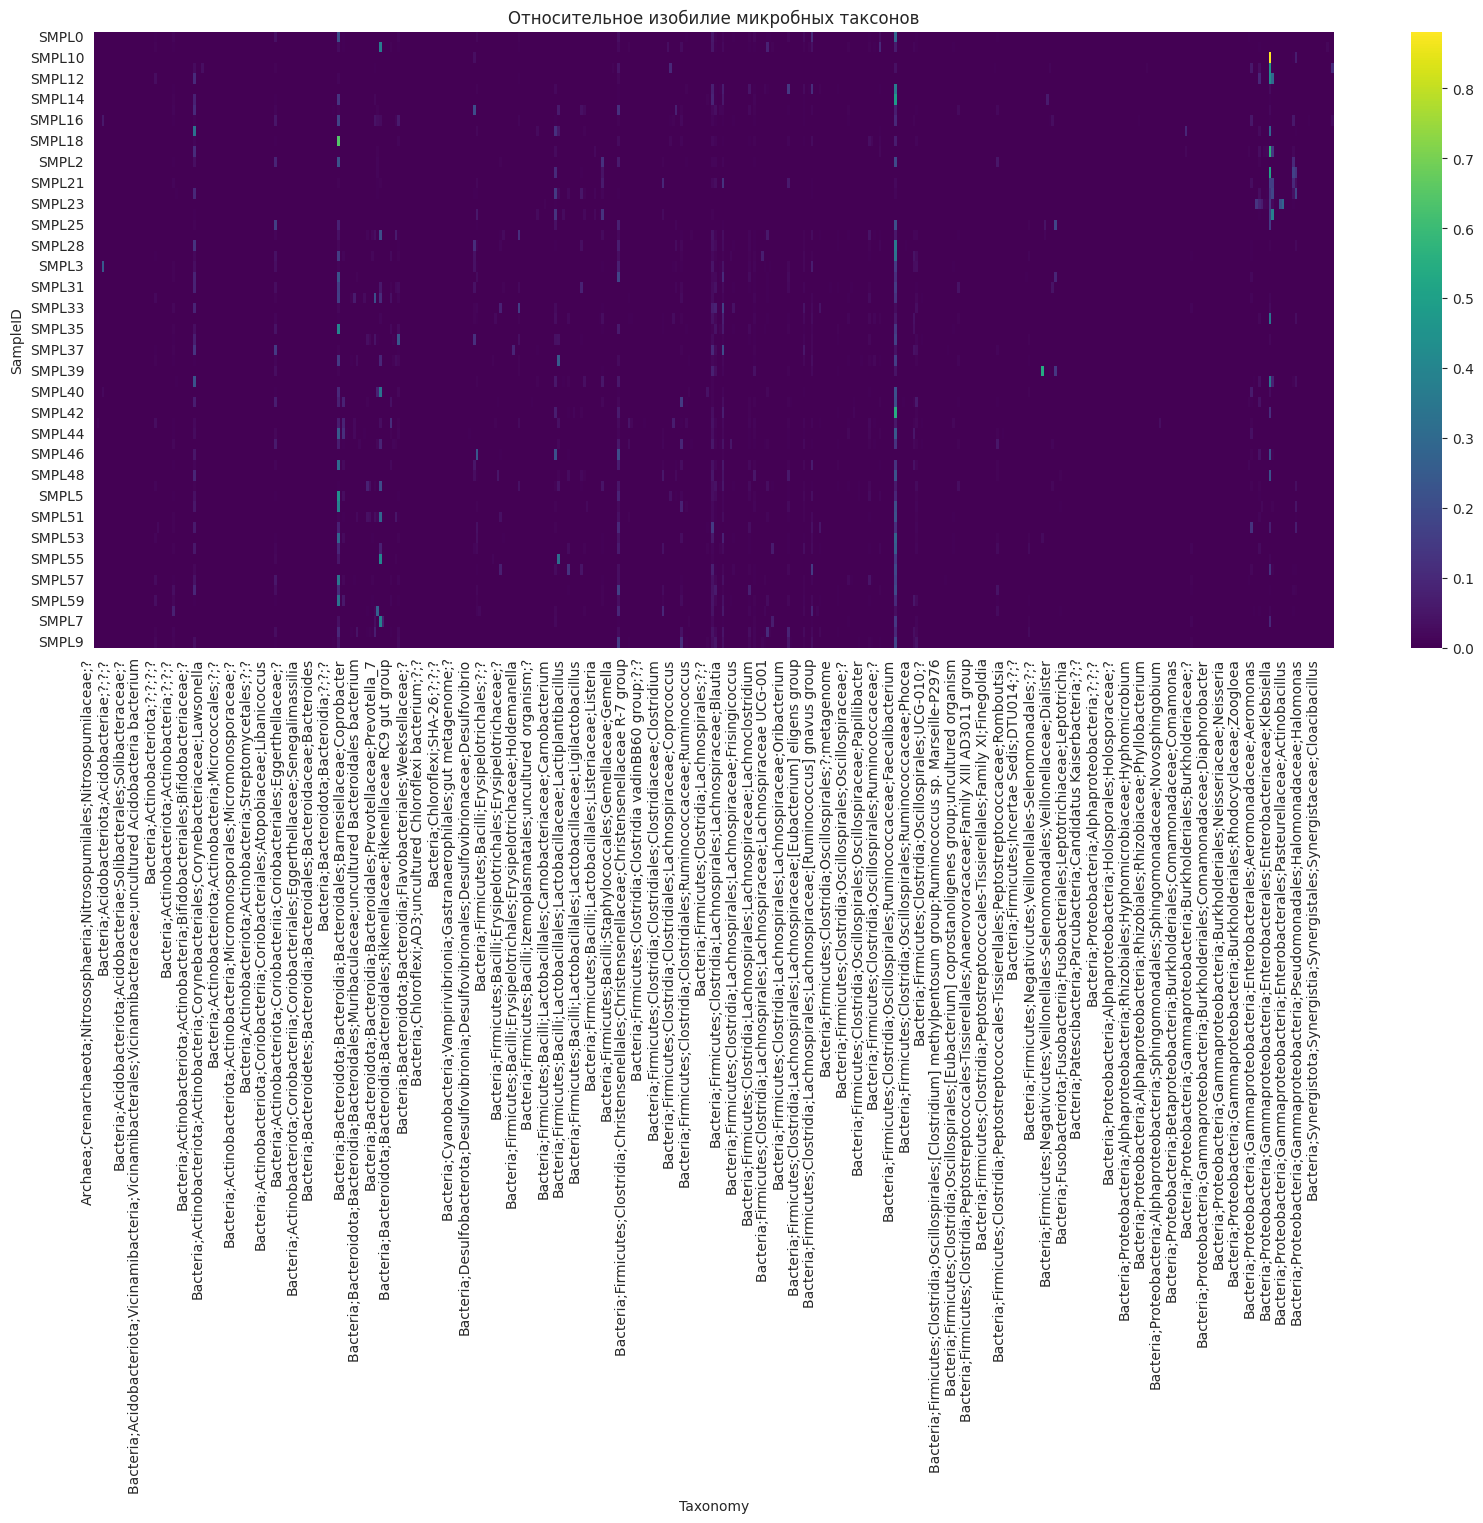

In [321]:
# Группировка данных по образцу и таксону для расчета общего количества наблюдений по таксонам
taxon_abundance = new_long_format_df.groupby(['#SampleID', 'Taxonomy'])['Value'].sum().reset_index()

# Расчет общего количества микробов в каждом образце
total_abundance = taxon_abundance.groupby('#SampleID')['Value'].sum().reset_index().rename(columns={'Value': 'Total'})

# Присоединение общего количества микробов к таблице абсолютного изобилия таксонов
taxon_abundance = taxon_abundance.merge(total_abundance, on='#SampleID')

# Расчет относительного изобилия каждого таксона в каждом образце
taxon_abundance['RelativeAbundance'] = taxon_abundance['Value'] / taxon_abundance['Total']

# Визуализация относительного изобилия таксонов для первых нескольких образцов
import seaborn as sns
import matplotlib.pyplot as plt

# Фильтрация данных для визуализации (можете адаптировать это для конкретных образцов или таксонов)
plot_data = taxon_abundance.pivot(index='#SampleID', columns='Taxonomy', values='RelativeAbundance').fillna(0)

# Тепловая карта относительного изобилия
plt.figure(figsize=(20, 8))
sns.heatmap(plot_data, cmap='viridis')
plt.title('Относительное изобилие микробных таксонов')
plt.ylabel('SampleID')
plt.xlabel('Taxonomy')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('/home/esp/data_analyze/18.03.2024/figures/genus/Rel_all.pdf', bbox_inches = 'tight')
plt.show()


/tmp/ipykernel_21797/4134072729.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_data_pivot = plot_data.pivot(index='#SampleID', columns='Taxonomy', values='RelativeAbundance').fillna(0)
/tmp/ipykernel_21797/4134072729.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


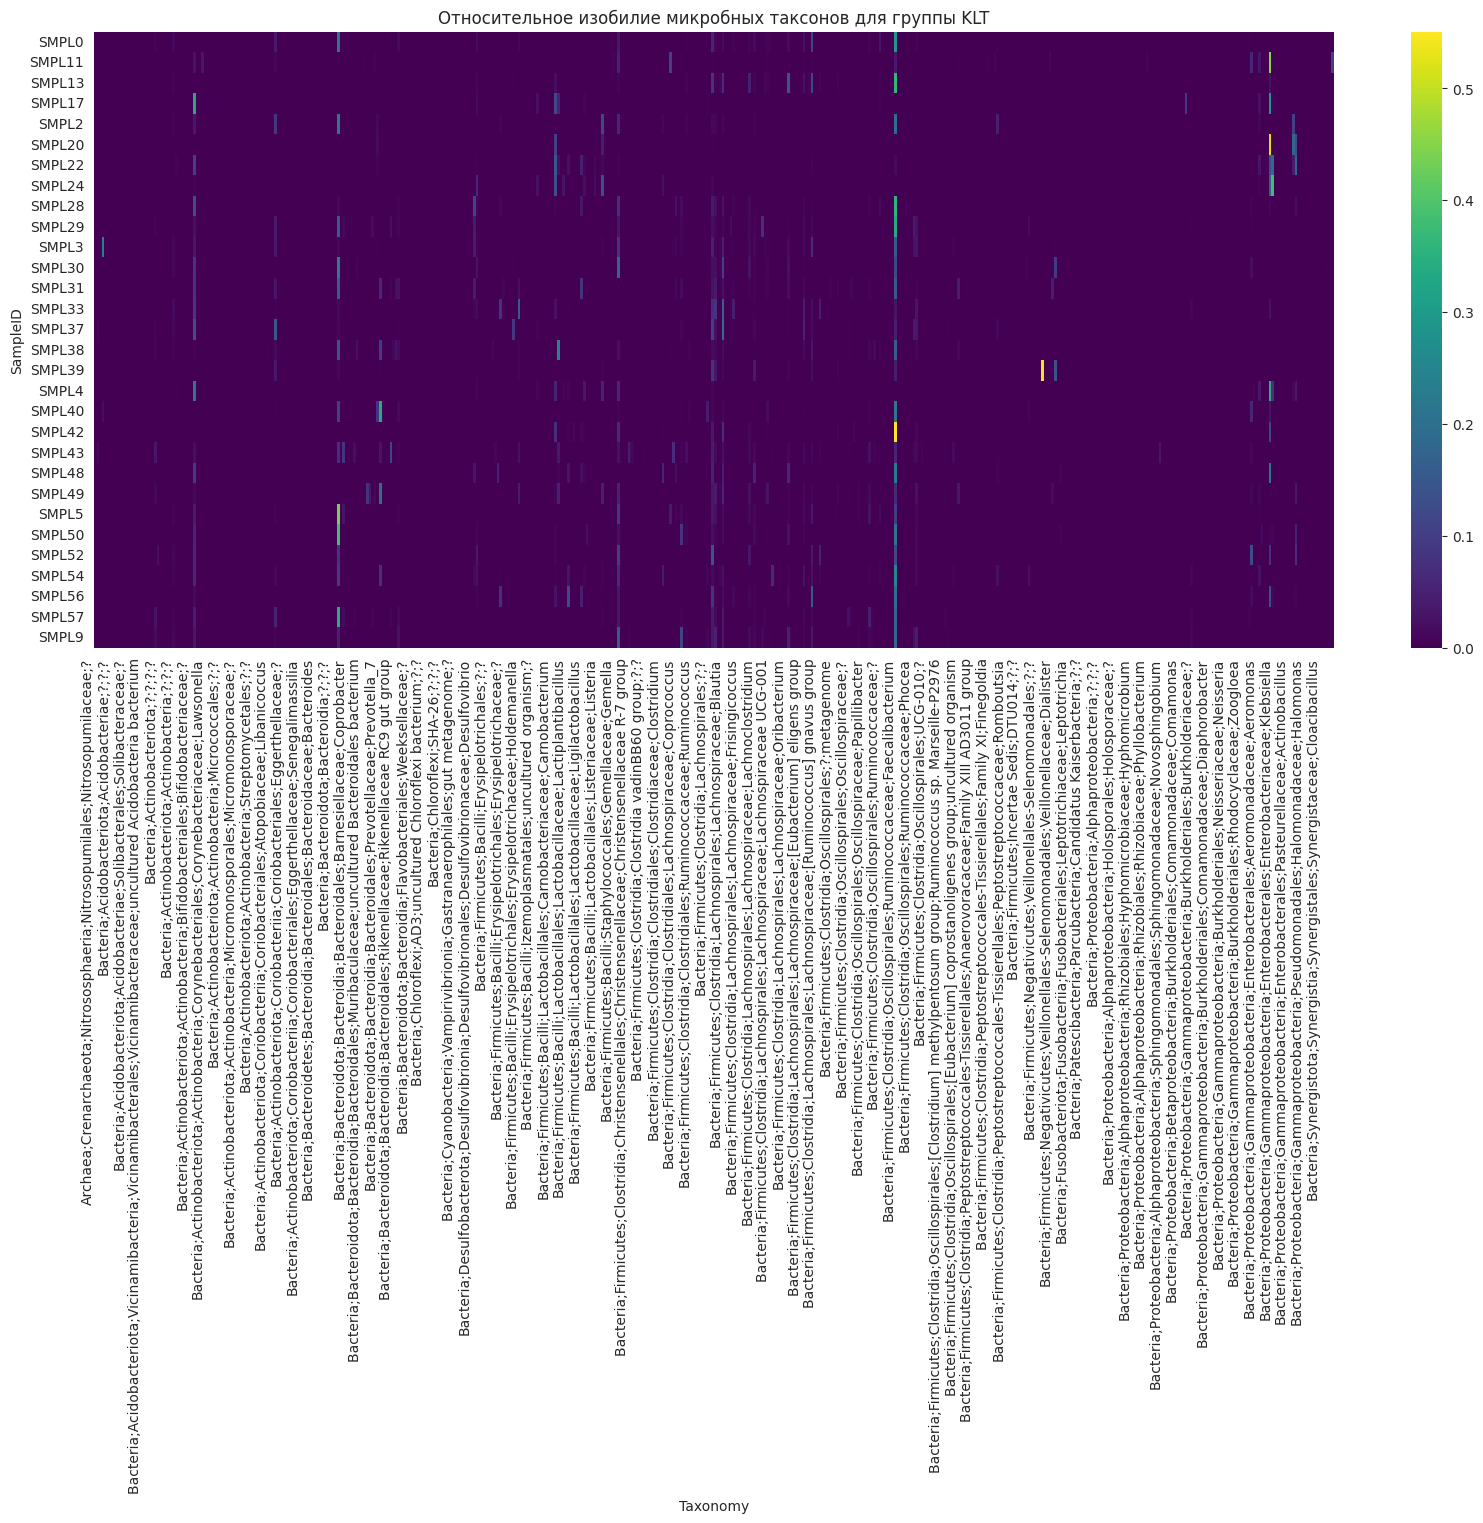

/tmp/ipykernel_21797/4134072729.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_data_pivot = plot_data.pivot(index='#SampleID', columns='Taxonomy', values='RelativeAbundance').fillna(0)
/tmp/ipykernel_21797/4134072729.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


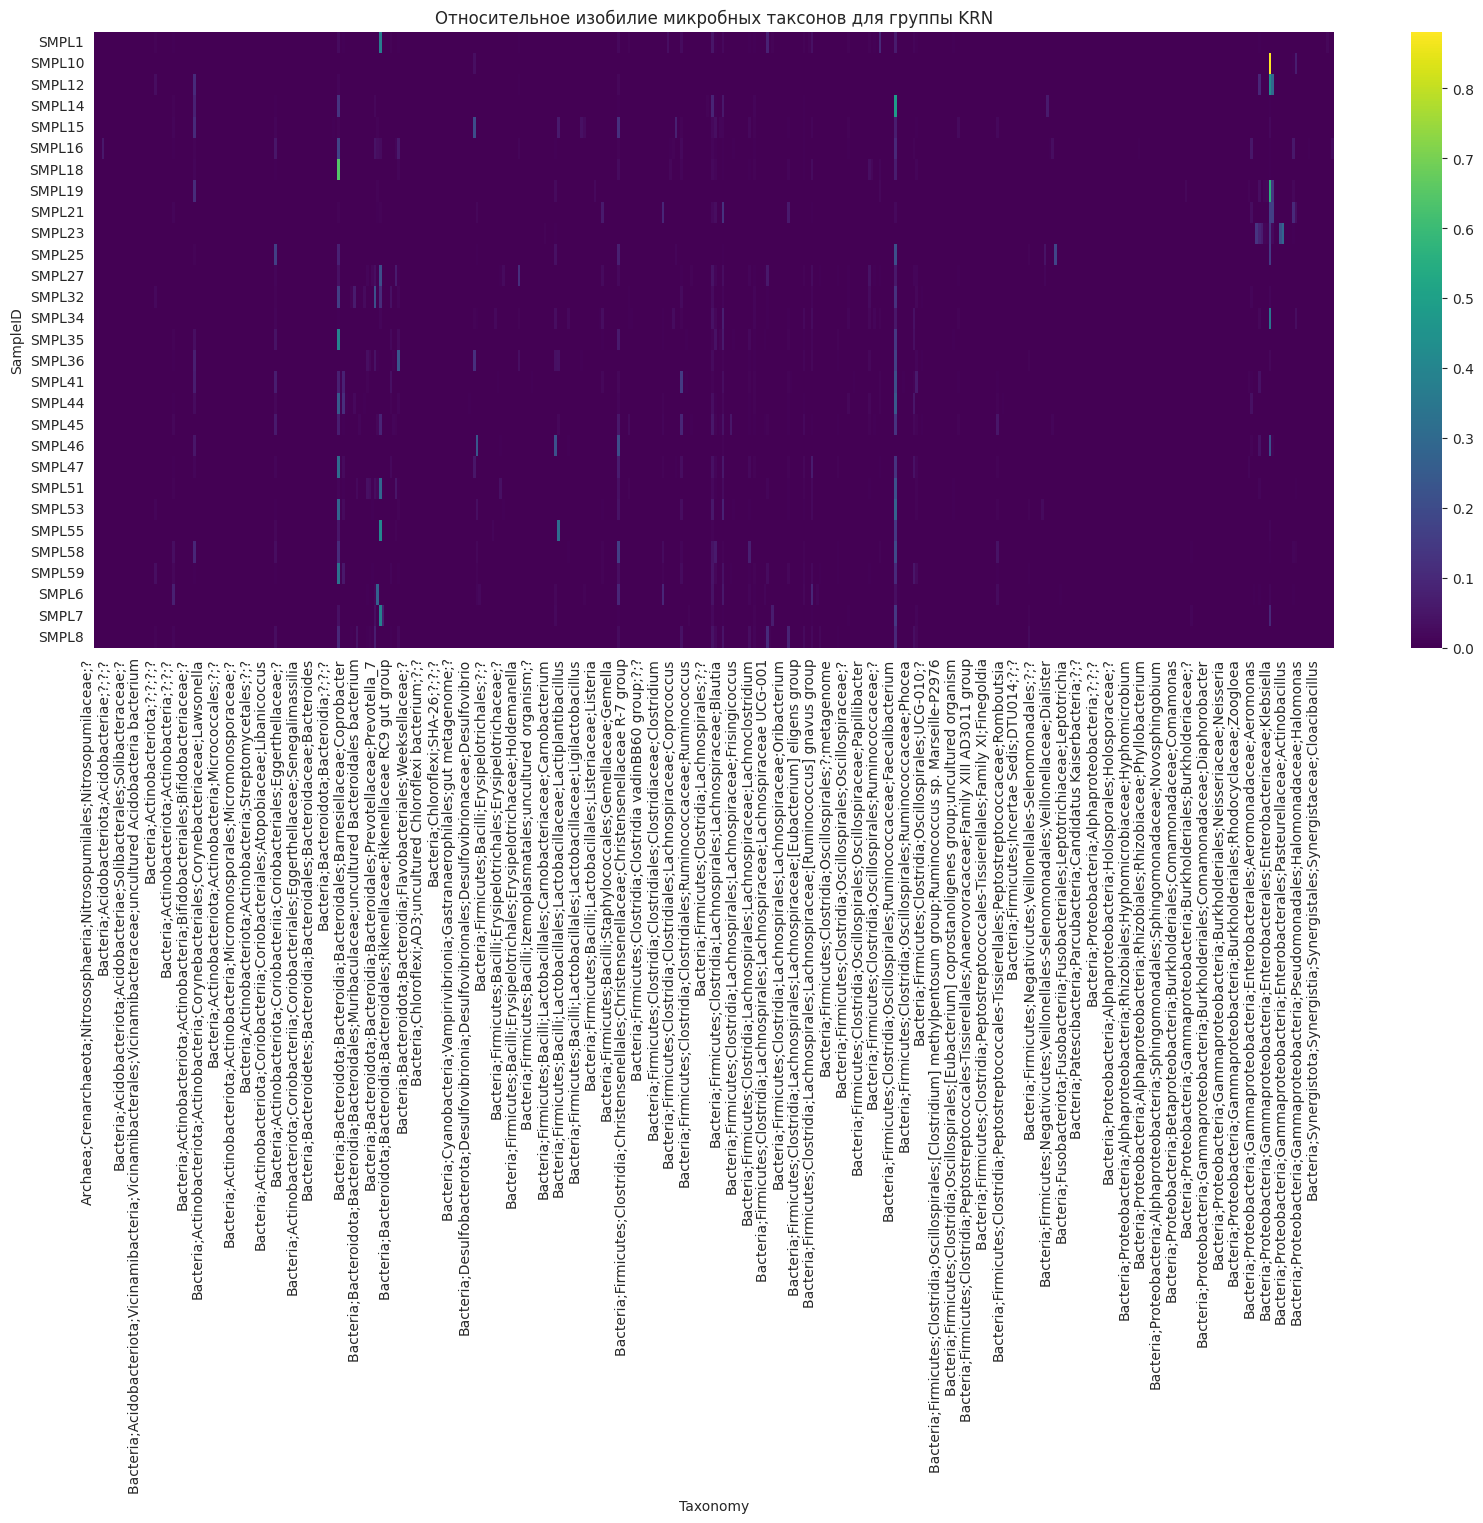

In [322]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагаем, что new_long_format_df уже загружен и представляет собой ваш DataFrame

# Выполнение группировки данных по образцу и таксону для расчета общего количества наблюдений по таксонам
taxon_abundance = new_long_format_df.groupby(['#SampleID', 'Taxonomy', 'GROUP'])['Value'].sum().reset_index()

# Расчет общего количества микробов в каждом образце
total_abundance = taxon_abundance.groupby(['#SampleID', 'GROUP'])['Value'].sum().reset_index().rename(columns={'Value': 'Total'})

# Присоединение общего количества микробов к таблице абсолютного изобилия таксонов
taxon_abundance = taxon_abundance.merge(total_abundance, on=['#SampleID', 'GROUP'])

# Расчет относительного изобилия каждого таксона в каждом образце
taxon_abundance['RelativeAbundance'] = taxon_abundance['Value'] / taxon_abundance['Total']

# Функция для визуализации относительного изобилия таксонов для группы
def plot_group(group_name):
    # Фильтрация данных для группы
    plot_data = taxon_abundance[taxon_abundance['GROUP'] == group_name]
    
    # Подготовка данных для тепловой карты
    plot_data_pivot = plot_data.pivot(index='#SampleID', columns='Taxonomy', values='RelativeAbundance').fillna(0)

    # Визуализация тепловой карты
    plt.figure(figsize=(20, 8))
    sns.heatmap(plot_data_pivot, cmap='viridis')
    plt.title(f'Относительное изобилие микробных таксонов для группы {group_name}')
    plt.ylabel('SampleID')
    plt.xlabel('Taxonomy')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.savefig(f'/home/esp/data_analyze/18.03.2024/figures/genus/Rel_all{group_name}.pdf', bbox_inches = 'tight')
    plt.show()

# Визуализация для группы KLT
plot_group('KLT')

# Визуализация для группы KRN
plot_group('KRN')


In [239]:
taxon_abundance.head()

,#SampleID,Taxonomy,GROUP,Value,Total,RelativeAbundance
0,SMPL0,c_Acidobacteriae,KLT,0,181532,0.0
1,SMPL0,c_Actinobacteria,KLT,2041,181532,0.011243
2,SMPL0,c_Alphaproteobacteria,KLT,0,181532,0.0
3,SMPL0,c_Bacilli,KLT,2794,181532,0.015391
4,SMPL0,c_Bacteroidia,KLT,0,181532,0.0


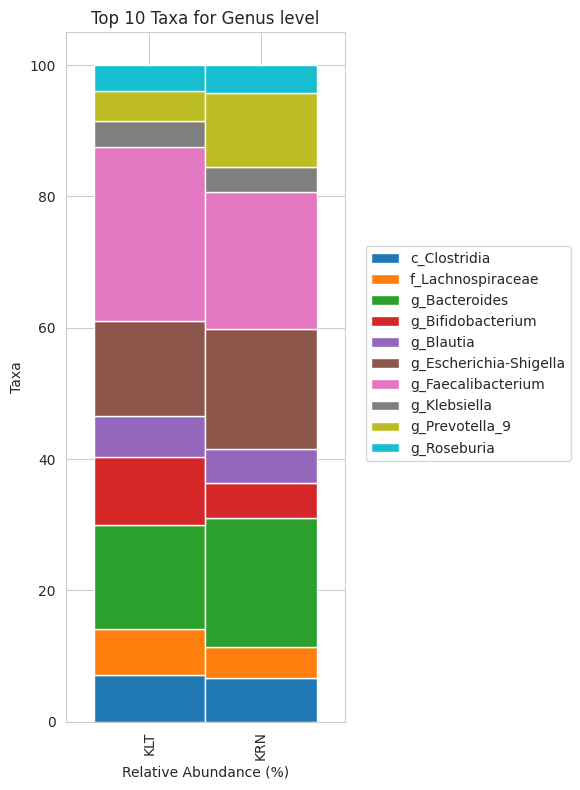

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ваш DataFrame taxon_abundance должен быть уже предварительно обработан, как обсуждалось ранее
mean_abundance = taxon_abundance.groupby(['GROUP', 'Taxonomy'])['RelativeAbundance'].mean().reset_index()

mean_abundance['RelativeAbundance'] = pd.to_numeric(mean_abundance['RelativeAbundance'], errors='coerce')
# Определяем топ-10 таксонов для каждой группы (для этого примера используем 'KLT' и 'KRN' вместо 'before' и 'after')
top_taxa = mean_abundance.groupby('Taxonomy')['RelativeAbundance'].mean().nlargest(10).index

# Фильтруем DataFrame для топ-10 таксонов
top_taxon_abundance = mean_abundance[mean_abundance['Taxonomy'].isin(top_taxa)]

# Создаем сводную таблицу для визуализации
pivot_table = top_taxon_abundance.pivot_table(
    index='GROUP', 
    columns='Taxonomy', 
    values='RelativeAbundance', 
    aggfunc='mean'
)


# Подготавливаем данные для стековой диаграммы, убедившись, что строки суммируются в 100%
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = sns.color_palette('tab10', n_colors=11)

fig, ax = plt.subplots(figsize=(6, 8)) # Измените размеры здесь

# Строим стековую диаграмму, используя созданные оси
pivot_table.plot(kind='bar', stacked=True, color=colors, width=1, edgecolor='white', ax=ax)
# Добавляем заголовок и подписи осей
ax.set_title('Top 10 Taxa for Genus level')
ax.set_xlabel('Relative Abundance (%)')
ax.set_ylabel('Taxa')
# Перемещаем легенду
ax.legend(bbox_to_anchor=(1.05, 0.7), loc='upper left')
# Оптимизируем расположение элементов графика
plt.tight_layout()
# Сохраняем график в файл
plt.savefig('/home/esp/data_analyze/18.03.2024/figures/genus/top10.pdf', bbox_inches = 'tight')
# Показываем график
plt.show()


/tmp/ipykernel_21797/1586029894.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_data = pd.DataFrame({'KLT': plot_data_KLT, 'KRN': plot_data_KRN}).fillna(0)


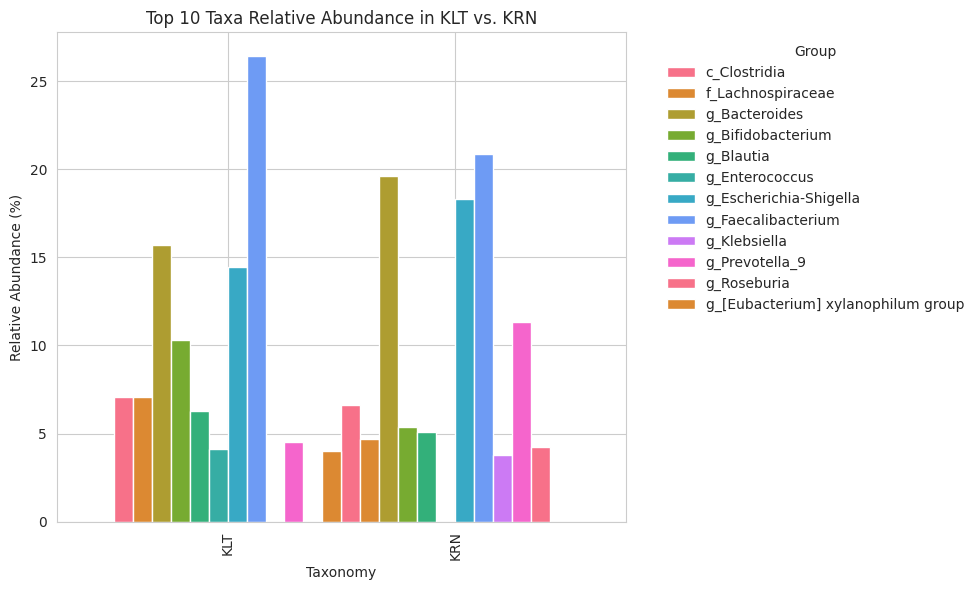

In [320]:
mean_abundance = taxon_abundance.groupby(['GROUP', 'Taxonomy'])['RelativeAbundance'].mean().reset_index()

mean_abundance['RelativeAbundance'] = pd.to_numeric(mean_abundance['RelativeAbundance'], errors='coerce')

# Теперь разделяем средние значения по группам
group_KLT = mean_abundance[mean_abundance['GROUP'] == 'KLT']
group_KRN = mean_abundance[mean_abundance['GROUP'] == 'KRN']

# Находим топ-10 таксонов по среднему относительному изобилию для каждой группы
top10_KLT = group_KLT.nlargest(10, 'RelativeAbundance')['Taxonomy']
top10_KRN = group_KRN.nlargest(10, 'RelativeAbundance')['Taxonomy']

# Фильтруем исходный DataFrame для получения данных только по топ-10 таксонам каждой группы
filtered_KLT = taxon_abundance[(taxon_abundance['Taxonomy'].isin(top10_KLT)) & (taxon_abundance['GROUP'] == 'KLT')]
filtered_KRN = taxon_abundance[(taxon_abundance['Taxonomy'].isin(top10_KRN)) & (taxon_abundance['GROUP'] == 'KRN')]

# Пересчитываем среднее относительное изобилие для отфильтрованных данных
plot_data_KLT = filtered_KLT.groupby('Taxonomy')['RelativeAbundance'].mean()
plot_data_KRN = filtered_KRN.groupby('Taxonomy')['RelativeAbundance'].mean()

# Объединяем данные в один DataFrame для визуализации
plot_data = pd.DataFrame({'KLT': plot_data_KLT, 'KRN': plot_data_KRN}).fillna(0)
plot_data = plot_data.T

# Преобразуем проценты для более читабельной визуализации
plot_data_percentage = plot_data.div(plot_data.sum(axis=1), axis=0) * 100

# Создаем график
colors = sns.color_palette('husl', n_colors=10)

fig, ax = plt.subplots(figsize=(10, 6))

plot_data_percentage.plot(kind='bar', ax=ax, width=1, color=colors, edgecolor="white")
ax.set_ylabel('Relative Abundance (%)')
ax.set_xlabel('Taxonomy')
ax.set_title('Top 10 Taxa Relative Abundance in KLT vs. KRN')
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig('/home/esp/data_analyze/18.03.2024/figures/genus/top10_orient.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
plot_data_before = group_before[top10_before].mean()
plot_data_after = group_after[top10_after].mean()

# Объединим данные в один DataFrame для удобства
plot_data = pd.DataFrame({'Before': plot_data_before, 'After': plot_data_after}).fillna(0)
plot_data = plot_data.T
plot_data_percentage = plot_data.div(plot_data.sum(axis=1), axis=0) * 100

colors = sns.color_palette('husl', n_colors=10)

fig, ax = plt.subplots(figsize=(6, 8))

plot_data_percentage.plot(kind='bar', stacked=True, ax=ax, width=1, color=colors, edgecolor="white")
ax.set_ylabel('Relative Abundance (%)')
ax.set_xlabel('Relative Abundance (%)')
ax.set_title('Top 10 Taxa for Genus level')
plt.legend(title="", bbox_to_anchor=(1.05, 0.75), loc='upper left', frameon = False)


plt.tight_layout()
#plt.savefig('figures/lact_vs_bact/genus_lvl.pdf', bbox_inches = 'tight')
plt.show()


In [242]:
mean_abundance = taxon_abundance.groupby(['GROUP', 'Taxonomy'])['RelativeAbundance'].mean().reset_index()

# Теперь разделяем средние значения по группам
group_KLT = mean_abundance[mean_abundance['GROUP'] == 'KLT']
group_KRN = mean_abundance[mean_abundance['GROUP'] == 'KRN']

group_KLT

,GROUP,Taxonomy,RelativeAbundance
0,KLT,c_Acidobacteriae,0.0
1,KLT,c_Actinobacteria,0.004295
2,KLT,c_Alphaproteobacteria,0.000001
3,KLT,c_Bacilli,0.008722
4,KLT,c_Bacteroidia,0.000071
...,...,...,...
430,KLT,p_Bacteroidota,0.000053
431,KLT,p_Chloroflexi,0.0
432,KLT,p_Desulfobacterota,0.0
433,KLT,p_Firmicutes,0.009891


In [285]:
mean_abundance

,GROUP,Taxonomy,RelativeAbundance
0,KLT,c_Acidobacteriae,0.000000e+00
1,KLT,c_Actinobacteria,4.294702e-03
2,KLT,c_Alphaproteobacteria,6.600817e-07
3,KLT,c_Bacilli,8.722169e-03
4,KLT,c_Bacteroidia,7.120241e-05
...,...,...,...
865,KRN,p_Bacteroidota,2.202375e-05
866,KRN,p_Chloroflexi,2.896615e-06
867,KRN,p_Desulfobacterota,3.077654e-05
868,KRN,p_Firmicutes,1.468638e-02


/tmp/ipykernel_21797/2036712442.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RelativeAbundance', y='Taxonomy', data=top_dominant_taxa, palette='viridis')


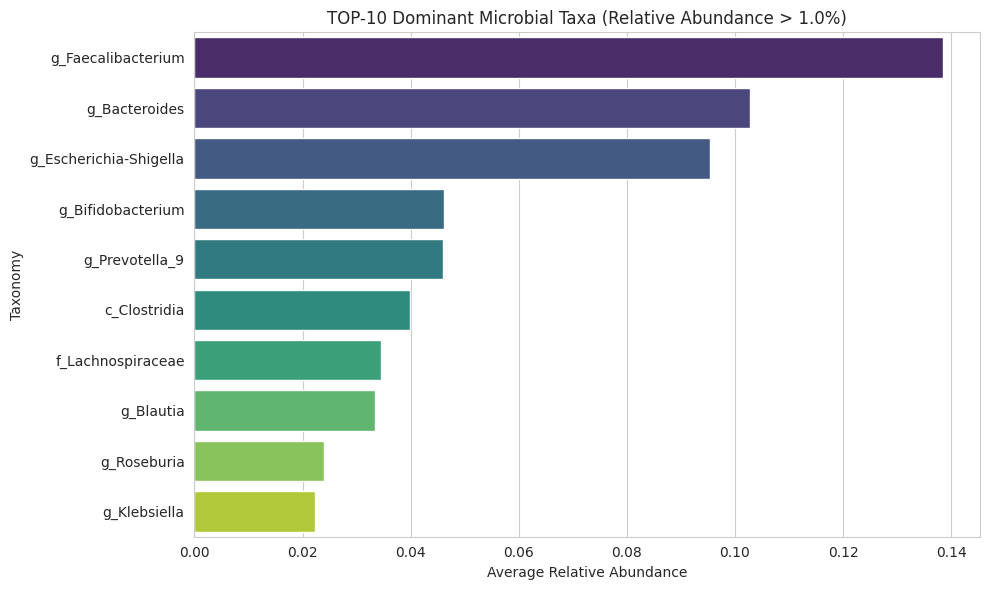

In [227]:
# Расчет среднего относительного изобилия для каждого таксона
mean_relative_abundance = taxon_abundance.groupby('Taxonomy')['RelativeAbundance'].mean().reset_index()

# Фильтрация таксонов, среднее относительное изобилие которых превышает заданный порог
threshold = 0.01  # 1%
dominant_taxa = mean_relative_abundance[mean_relative_abundance['RelativeAbundance'] > threshold]

# Выбор TOP-N таксонов по среднему относительному изобилию
top_n = 10
top_dominant_taxa = dominant_taxa.sort_values(by='RelativeAbundance', ascending=False).head(top_n)

# Визуализация относительного изобилия для TOP-N таксонов
plt.figure(figsize=(10, 6))
sns.barplot(x='RelativeAbundance', y='Taxonomy', data=top_dominant_taxa, palette='viridis')
plt.title(f'TOP-{top_n} Dominant Microbial Taxa (Relative Abundance > {threshold*100}%)')
plt.xlabel('Average Relative Abundance')
plt.ylabel('Taxonomy')
plt.tight_layout()
plt.show()


In [293]:
galaxy_df = long_format_df.copy()
galaxy_df.head()

,OTU,Taxonomy,#SampleID,GROUP,Value
0,ASV0001,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL0,KLT,0
1,ASV0002,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL1,KRN,0
2,ASV0003,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL10,KRN,0
3,ASV0004,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL11,KLT,0
4,ASV0005,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosop...,SMPL12,KRN,0


In [295]:

galaxy_df = pd.DataFrame(data)

# Разделение колонки Taxonomy на многоуровневые колонки и формирование иерархического индекса
galaxy_df['Taxonomy'] = galaxy_df['Taxonomy'].str.split(';')
tax_levels = galaxy_df['Taxonomy'].apply(lambda x: len(x)).max()
galaxy_df = galaxy_df.explode('Taxonomy')

# Перестановка данных для получения нужного формата
pivot_df = galaxy_df.pivot_table(index='Taxonomy', columns=['#SampleID', 'GROUP'], values='Value', fill_value=0)

# Преобразование для соответствия формату LEfSe
# Это может потребовать дополнительной обработки, в зависимости от структуры вашего конкретного DataFrame
pivot_df.to_csv('dataframes/output/galaxy.csv', sep='\t')
pivot_df.head()

/tmp/ipykernel_21797/2724215044.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_df = galaxy_df.pivot_table(index='Taxonomy', columns=['#SampleID', 'GROUP'], values='Value', fill_value=0)


#SampleID,SMPL0,SMPL1,SMPL10,SMPL11,SMPL12,SMPL13,SMPL14,SMPL15,SMPL16,SMPL17,...,SMPL54,SMPL55,SMPL56,SMPL57,SMPL58,SMPL59,SMPL6,SMPL7,SMPL8,SMPL9
GROUP,KLT,KRN,KRN,KLT,KRN,KLT,KRN,KRN,KRN,KLT,...,KLT,KRN,KLT,KLT,KRN,KRN,KRN,KRN,KRN,KLT
Taxonomy,,,,,,,,,,,,,,,,,,,,,
d_Archaea|p_Crenarchaeota|c_Nitrososphaeria|o_Nitrosopumilales|f_Nitrosopumilaceae|g_?|s_?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,223.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
d_Archaea|p_Euryarchaeota|c_Methanobacteria|o_Methanobacteriales|f_Methanobacteriaceae|g_Methanobrevibacter|s_Methanobrevibacter smithii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
d_Archaea|p_Euryarchaeota|c_Methanobacteria|o_Methanobacteriales|f_Methanobacteriaceae|g_Methanosphaera|s_Methanosphaera stadtmanae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
d_Bacteria|p_?|c_?|o_?|f_?|g_?|s_?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,1841.833333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0
d_Bacteria|p_Acidobacteria|c_Acidobacteriia|o_Acidobacteriales|f_Koribacteraceae|g_?|s_?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,17.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [319]:
import pandas as pd

# Предполагается, что pivot_df уже содержит агрегированные данные, как вы описали

# Считаем общее изобилие для каждого образца
total_abundance_per_sample = pivot_df.sum()

# Рассчитываем относительное изобилие, деля значение изобилия в каждой ячейке на общее изобилие для соответствующего образца
relative_abundance = pivot_df.divide(total_abundance_per_sample, axis='columns')

relative_abundance.to_csv('dataframes/output/galaxy.tsv', sep='\t', index=True)

# Проверка результата
relative_abundance.head()


#SampleID,SMPL0,SMPL1,SMPL10,SMPL11,SMPL12,SMPL13,SMPL14,SMPL15,SMPL16,SMPL17,...,SMPL54,SMPL55,SMPL56,SMPL57,SMPL58,SMPL59,SMPL6,SMPL7,SMPL8,SMPL9
GROUP,KLT,KRN,KRN,KLT,KRN,KLT,KRN,KRN,KRN,KLT,...,KLT,KRN,KLT,KLT,KRN,KRN,KRN,KRN,KRN,KLT
Taxonomy,,,,,,,,,,,,,,,,,,,,,
d_Archaea|p_Crenarchaeota|c_Nitrososphaeria|o_Nitrosopumilales|f_Nitrosopumilaceae|g_?|s_?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.005055,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
d_Archaea|p_Euryarchaeota|c_Methanobacteria|o_Methanobacteriales|f_Methanobacteriaceae|g_Methanobrevibacter|s_Methanobrevibacter smithii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
d_Archaea|p_Euryarchaeota|c_Methanobacteria|o_Methanobacteriales|f_Methanobacteriaceae|g_Methanosphaera|s_Methanosphaera stadtmanae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
d_Bacteria|p_?|c_?|o_?|f_?|g_?|s_?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.041749,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0
d_Bacteria|p_Acidobacteria|c_Acidobacteriia|o_Acidobacteriales|f_Koribacteraceae|g_?|s_?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000385,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [312]:
to_galaxy = pd.read_csv('/home/esp/data_analyze/18.03.2024/dataframes/output/galaxy.csv', sep = '\t',)

TypeError: read_csv() got an unexpected keyword argument 'index'

In [309]:
to_galaxy = to_galaxy.set_index('#SampleID')
df_reset = to_galaxy.reset_index()

# Переименовываем столбец с индексом в '#SampleID'
df_renamed = df_reset.rename(columns={'index': '#SampleID'})
df_renamed.head()

,#SampleID,SMPL0,SMPL1,SMPL10,SMPL11,SMPL12,SMPL13,SMPL14,SMPL15,SMPL16,...,SMPL54,SMPL55,SMPL56,SMPL57,SMPL58,SMPL59,SMPL6,SMPL7,SMPL8,SMPL9
0,GROUP,KLT,KRN,KRN,KLT,KRN,KLT,KRN,KRN,KRN,...,KLT,KRN,KLT,KLT,KRN,KRN,KRN,KRN,KRN,KLT
1,d_Archaea|p_Crenarchaeota|c_Nitrososphaeria|o_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00505481862134905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,d_Archaea|p_Euryarchaeota|c_Methanobacteria|o_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d_Archaea|p_Euryarchaeota|c_Methanobacteria|o_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d_Bacteria|p_?|c_?|o_?|f_?|g_?|s_?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.154601780946469e-06,0.04174947726795841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1102897575135315e-06,0.0,0.0


In [298]:
check_csv = pd.read_csv('dataframes/output/galaxy.csv', sep='\t')
print("Проверка на наличие пустых значений в данных:")
print(df.isnull().sum())

# Проверка уникальных значений в столбце GROUP, чтобы убедиться в их корректности
print("\nУникальные значения в столбце GROUP:")
print(df['GROUP'].unique())

# Проверка формата значений в колонках с данными (ожидаются числовые значения)
print("\nПроверка формата данных в столбцах с измерениями:")
try:
    for col in df.columns[2:]:  # Предполагается, что первые два столбца - не числовые данные
        df[col] = pd.to_numeric(df[col], errors='raise')
    print("Формат данных в порядке, все значения числовые.")
except ValueError as e:
    print("Ошибка в формате данных: ", e)

Проверка на наличие пустых значений в данных:
OTU          0
Taxonomy     0
#SampleID    0
GROUP        0
Value        0
dtype: int64

Уникальные значения в столбце GROUP:
['KLT' 'KRN']

Проверка формата данных в столбцах с измерениями:
Ошибка в формате данных:  Unable to parse string "SMPL0" at position 0


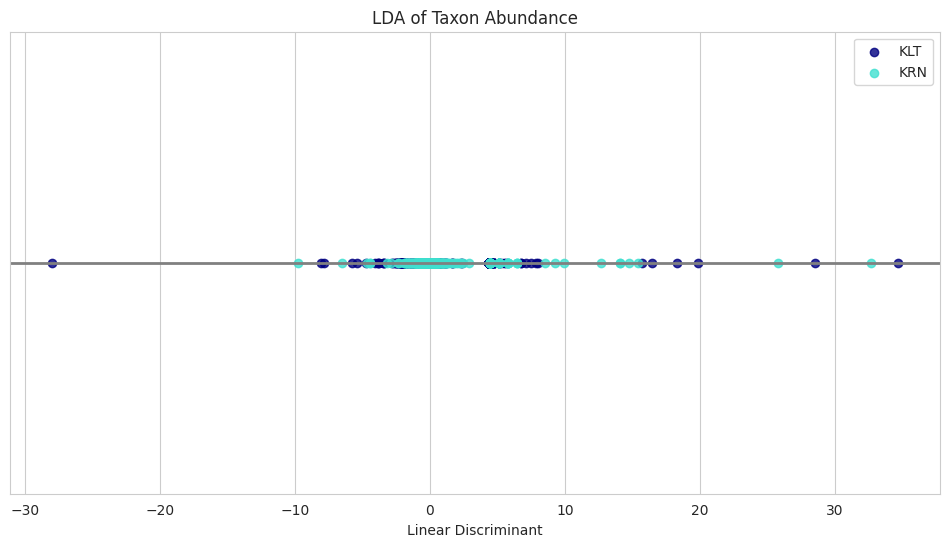

In [286]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Подготавливаем данные
# taxon_abundance - это DataFrame с данными об изобилии таксонов, где 'GROUP' - это метки классов

# Выделяем признаки и классы
X = taxon_abundance.drop(columns=['#SampleID', 'Taxonomy', 'GROUP'])  # или какой-то подмножество данных
y = taxon_abundance['GROUP']


# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Инициализация и обучение LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Преобразуем данные
X_lda = lda.transform(X_scaled)

# Визуализация результатов
plt.figure(figsize=(12, 6))
colors = ['navy', 'turquoise', 'darkorange']

for color, target_name in zip(colors, y.unique()):
    plt.scatter(X_lda[y == target_name], [0] * sum(y == target_name), alpha=.8, color=color,
                label=target_name)
plt.axhline(0, color='grey', lw=2) # Добавляем линию X-оси для справки
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Taxon Abundance')
plt.xlabel('Linear Discriminant')
plt.yticks([])
plt.show()
